In [12]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import json
import glob
%matplotlib inline

from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

In [59]:
coco = COCO("./data/VRDL_data/annotations/pascal_train.json") # load training annotations

loading annotations into memory...
Done (t=0.31s)
creating index...
index created!


In [14]:
coco.cats # check the category

{1: {'supercategory': 'aeroplane', 'name': 'aeroplane', 'id': 1},
 2: {'supercategory': 'bicycle', 'name': 'bicycle', 'id': 2},
 3: {'supercategory': 'bird', 'name': 'bird', 'id': 3},
 4: {'supercategory': 'boat', 'name': 'boat', 'id': 4},
 5: {'supercategory': 'bottle', 'name': 'bottle', 'id': 5},
 6: {'supercategory': 'bus', 'name': 'bus', 'id': 6},
 7: {'supercategory': 'car', 'name': 'car', 'id': 7},
 8: {'supercategory': 'cat', 'name': 'cat', 'id': 8},
 9: {'supercategory': 'chair', 'name': 'chair', 'id': 9},
 10: {'supercategory': 'cow', 'name': 'cow', 'id': 10},
 11: {'supercategory': 'diningtable', 'name': 'diningtable', 'id': 11},
 12: {'supercategory': 'dog', 'name': 'dog', 'id': 12},
 13: {'supercategory': 'horse', 'name': 'horse', 'id': 13},
 14: {'supercategory': 'motorbike', 'name': 'motorbike', 'id': 14},
 15: {'supercategory': 'person', 'name': 'person', 'id': 15},
 16: {'supercategory': 'pottedplant', 'name': 'pottedplant', 'id': 16},
 17: {'supercategory': 'sheep', 'n

In [31]:
# The keys in coco.imgs (dictionary) can be used to track each image
keys = list(coco.imgs.keys())
keys.sort()
print(keys[:20])
print(coco.imgs[736])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21]
{'file_name': '2009_001816.jpg', 'id': 736, 'height': 375, 'width': 500}


In [16]:
imgIds = 5 # Use the key above to retrieve information of the image
img_info = coco.loadImgs(ids=imgIds)
print(img_info)

[{'file_name': '2007_000129.jpg', 'id': 5, 'height': 500, 'width': 334}]


(500, 334, 3)


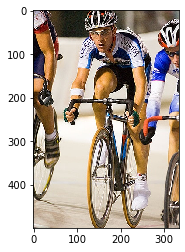

In [17]:
image = cv2.imread('./data/VRDL_data/images/train_images/' + img_info[0]['file_name'])[:,:,::-1]
print(image.shape)
# In your implementation, you should find this image in **train_images/** folders
plt.imshow(image)
plt.show()

In [49]:
for idx in keys:
    try:
        img_info = coco.loadImgs(ids=idx)
        print(img_info)
    except:
        pass

[{'file_name': '2007_000033.jpg', 'id': 1, 'height': 366, 'width': 500}]
[{'file_name': '2007_000042.jpg', 'id': 2, 'height': 335, 'width': 500}]
[{'file_name': '2007_000061.jpg', 'id': 3, 'height': 333, 'width': 500}]
[{'file_name': '2007_000123.jpg', 'id': 4, 'height': 375, 'width': 500}]
[{'file_name': '2007_000129.jpg', 'id': 5, 'height': 500, 'width': 334}]
[{'file_name': '2007_000175.jpg', 'id': 6, 'height': 332, 'width': 500}]
[{'file_name': '2007_000187.jpg', 'id': 7, 'height': 375, 'width': 500}]
[{'file_name': '2007_000323.jpg', 'id': 8, 'height': 375, 'width': 500}]
[{'file_name': '2007_000332.jpg', 'id': 9, 'height': 333, 'width': 500}]
[{'file_name': '2007_000346.jpg', 'id': 10, 'height': 375, 'width': 500}]
[{'file_name': '2007_000452.jpg', 'id': 11, 'height': 375, 'width': 500}]
[{'file_name': '2007_000464.jpg', 'id': 12, 'height': 500, 'width': 375}]
[{'file_name': '2007_000491.jpg', 'id': 13, 'height': 334, 'width': 500}]
[{'file_name': '2007_000529.jpg', 'id': 14, 'he

In [37]:
# Use the imgIds to find all instance ids of the image
annids = coco.getAnnIds(imgIds=imgIds)
print(annids)

[9, 10, 11, 12, 13, 14]


In [48]:
anns = coco.loadAnns(annids)
print("Number of instances: ", len(annids))

Number of instances:  6


In [39]:
instance_id = 0
print(anns[instance_id].keys()) # check the information of the first instance of the image

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])


In [40]:
print("Polygons of segmenatation:      ", anns[instance_id]['segmentation'][0][:18])
print("Image id of this instance:      ", anns[instance_id]['image_id'])
print("Bounding box of this instance:  ", anns[instance_id]['bbox'])
print("Category_id:                    ", anns[instance_id]['category_id'])

Polygons of segmenatation:       [90, 257, 88, 259, 89, 260, 89, 261, 91, 263, 92, 263, 94, 261, 93, 260, 93, 259]
Image id of this instance:       5
Bounding box of this instance:   [79, 203, 173, 297]
Category_id:                     2


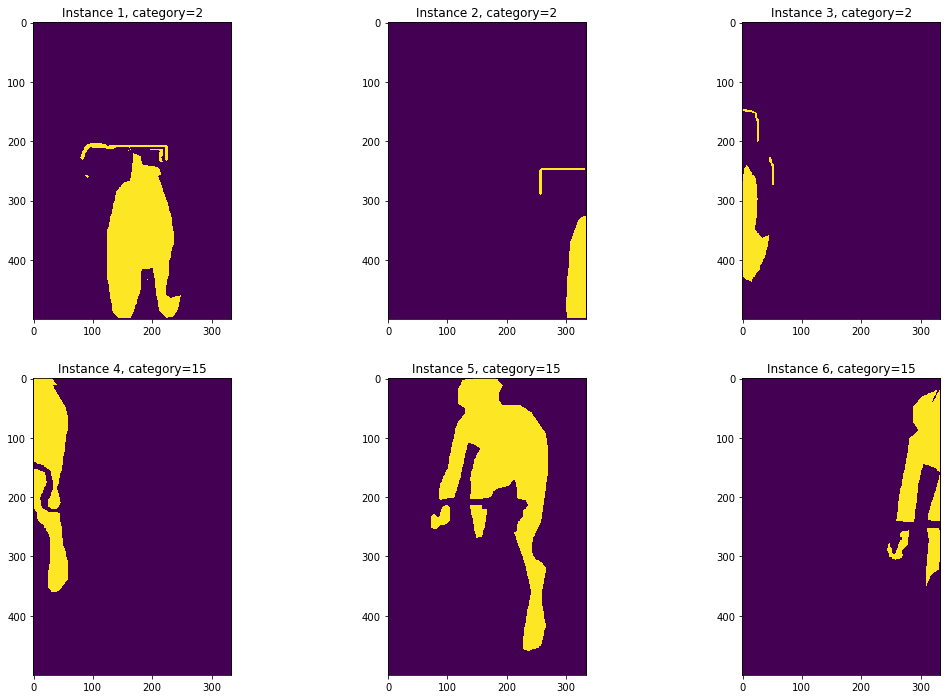

In [64]:
plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
for i in range(len(annids)):
    mask = coco.annToMask(anns[i])
    cate = anns[i]['category_id']
    plt.subplot(2, 3, i+1)
    plt.title("Instance {}, category={}".format(i+1, cate, coco.cats[cate]['name']))
    plt.imshow(mask)

## Prepare submission file
The format of submission.json file is same as the officail COCO evaluation format. Therefore, we can evaluate your results with the official evaluation code. Please see here for more details.

In [ ]:
cocoGt = COCO("test.json")

In [ ]:
from utils import binary_mask_to_rle

In [ ]:
coco_dt = []

for imgid in cocoGt.imgs:
    image = cv2.imread("test_images/" + coco.loadImgs(ids=imgid)[0]['file_name'])[:,:,::-1] # load image
    masks, categories, scores = model.predict(image) # run inference of your model
    n_instances = len(score)    if len(categories) > 0: # If any objects are detected in this image
        for i in range(n_instances): # Loop all instances
            # save information of the instance in a dictionary then append on coco_dt list
            pred = {}
            pred['image_id'] = imgid # this imgid must be same as the key of test.json
            pred['category_id'] = int(categories[i])
            pred['segmentation'] = binary_mask_to_rle(masks[:,:,i]) # save binary mask to RLE, e.g. 512x512 -> rle
            pred['score'] = float(scores[i])
            coco_dt.append(pred)

In [ ]:

with open("submission.json", "w") as f:
    json.dump(coco_dt, f)

### To validate your json file, you can predict on your training data and use code below to evaluate

In [67]:
cocoGt = COCO("./data/VRDL_data/annotations/pascal_train.json")

loading annotations into memory...
Done (t=0.30s)
creating index...
index created!


In [68]:
cocoDt = cocoGt.loadRes("submission.json")

cocoEval = COCOeval(cocoGt, cocoDt, 'segm')
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()

Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=1.85s).
Accumulating evaluation results...
DONE (t=0.30s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.432
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.712
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.448
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.125
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.334
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.558
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.407
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.502
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.502
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

In [91]:
with open('./data/VRDL_data/annotations/pascal_train.json' , 'r') as reader:
    jf = json.loads(reader.read())
#     print(jf.keys())
#     print(jf['annotations'][0].keys())
#     for jjf in jf['annotations'][:10]:
#         print(jjf['image_id'], jjf['id'])
#     print()
#     for jjf in jf['images'][:10]:
#         print(jjf['file_name'], jjf['id'])
#     print()
#     for jjf in jf['categories']:
#         print(jjf['supercategory'], jjf['name'], jjf['id'])
    
    train_set = {}
    valid_set = {}
    train_set['categories'] = jf['categories']
    valid_set['categories'] = jf['categories']
    train_set['images'] = jf['images'][100:]
    valid_set['images'] = jf['images'][:100]
    train_anno = []
    count = 1
    for i in train_set['images']:
        img_id = i['id']
        for tmp in jf['annotations']:
            if tmp['image_id'] == img_id:
                tmp['id'] = count
                count += 1
                train_anno.append(tmp)
    train_set['annotations'] = train_anno
    
    valid_anno = []
    count = 1
    for i in valid_set['images']:
        img_id = i['id']
        for tmp in jf['annotations']:
            if tmp['image_id'] == img_id:
                tmp['id'] = count
                count += 1
                valid_anno.append(tmp)
    valid_set['annotations'] = valid_anno
    with open("train_set.json", "w") as f:
        json.dump(train_set, f)
    with open("valid_set.json", "w") as f:
        json.dump(valid_set, f)

In [97]:
coco = COCO("valid_set.json") # load training annotations
coco.cats # check the category

keys = list(coco.imgs.keys())
keys.sort()
print(keys[0])
img_info = coco.loadImgs(ids=keys[0])
print(img_info)
annids = coco.getAnnIds(imgIds=keys[0])
anns = coco.loadAnns(annids)
print(annids)
for c, key in enumerate(keys):
    annids = coco.getAnnIds(imgIds=key)
    anns = coco.loadAnns(annids)
    for instance_id in range(len(annids)):
        print("Polygons of segmenatation:      ", anns[instance_id]['segmentation'][0][:18])
        print("Image id of this instance:      ", anns[instance_id]['image_id'])
        print("Bounding box of this instance:  ", anns[instance_id]['bbox'])
        print("Category_id:                    ", anns[instance_id]['category_id'])
    print(c, 'end')

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
1
[{'file_name': '2007_000033.jpg', 'id': 1, 'height': 366, 'width': 500}]
[53, 54, 55]
Polygons of segmenatation:       [291, 109, 291, 112, 290, 113, 290, 115, 289, 116, 289, 119, 288, 120, 288, 123, 287, 124]
Image id of this instance:       1
Bounding box of this instance:   [8, 109, 492, 153]
Category_id:                     1
Polygons of segmenatation:       [471, 200, 470, 201, 469, 201, 468, 202, 468, 203, 465, 206, 465, 207, 462, 210, 462, 211]
Image id of this instance:       1
Bounding box of this instance:   [419, 200, 64, 23]
Category_id:                     1
Polygons of segmenatation:       [391, 188, 390, 189, 387, 189, 386, 190, 386, 191, 383, 194, 383, 195, 381, 197, 381, 198]
Image id of this instance:       1
Bounding box of this instance:   [325, 188, 87, 35]
Category_id:                     1
0 end
Polygons of segmenatation:       [90, 257, 88, 259, 89, 260, 89, 261, 91, 263, 92, 26